In [1]:
using PyPlot

In [2]:
function reflection(nsteps, dt; D=5, x0 = 0.1)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        if q < 0.0
            pos[i] = -q
        else
            pos[i] = q
        end
    end
    pos
end
        
    

reflection (generic function with 1 method)

In [58]:
function rejectionupdating(nsteps, dt; D=1, x0 = 0.0)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        if q < 0.0
            pos[i] = pos[i-1]
        else
            pos[i] = q
        end
    end
    pos
end

rejectionupdating (generic function with 1 method)

In [59]:
function rejectionwithoutupdating(nsteps, dt; D=1, x0 = 0.0)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        while q < 0.0
            q = pos[i-1] + sqrt(2*D*dt)*randn()
        end
        pos[i] = q
    end
    pos
end

rejectionwithoutupdating (generic function with 1 method)

In [7]:
function conc(nsteps, dt; D =1, x0 = 0.1)
    t = (nsteps-1)*dt
    C(x) = 1/(4*pi*D*t)^(1/2)*(exp(-(x-x0)^2/(4*D*t)) + exp(-(x+x0)^2/(4*D*t)) )
end
    

conc (generic function with 1 method)

In [13]:
function behringer(nsteps, dt; D =1, x0 = 0.1)
    pos = zeros(nsteps)
    pos[1] = x0
    for i in 2:nsteps
        q = pos[i-1] + sqrt(2*D*dt)*randn()
        while q < 0.0
            q += sqrt(2*D*dt)*randn()
        end
        pos[i] = q
    end
    pos
end
    

behringer (generic function with 1 method)

In [ ]:
##Behringer
nsteps = 10000
dt = 1.e-4
posbehringer = behringer(nsteps, dt, D=5);
ncaminantes = 10000
for i in 1:ncaminantes
    temppos = reflection(nsteps, dt)
    posbehringer = hcat(posbehringer, temppos)
end

In [11]:
##Reflection
nsteps = 10000
dt = 1.e-4
pos = reflection(nsteps, dt, D=5);
ncaminantes = 10000
for i in 1:ncaminantes
    temppos = reflection(nsteps, dt)
    pos = hcat(pos, temppos)
end

In [7]:
nsteps = 10000
dt = 1.e-5
posrejupdt = rejectionupdating(nsteps, dt);
ncaminantes = 1000
for i in 1:ncaminantes
    temppos = rejectionupdating(nsteps, dt)
    posrejupdt = hcat(posrejupdt, temppos)
end

In [8]:
nsteps = 10000
dt = 1.e-5
posrejwupdt = rejectionwithoutupdating(nsteps, dt);
ncaminantes = 1000
for i in 1:ncaminantes
    temppos = rejectionwithoutupdating(nsteps, dt)
    posrejwupdt = hcat(posrejwupdt, temppos)
end

In [14]:
c = conc(nsteps,dt, D=5)
q = 0.0:0.01:16
theorconc = [c(i) for i in q];

In [15]:
xfreflection = pos[end,:];
xfrejupdt = posrejupdt[end,:];
xfrejwupdt = posrejwupdt[end,:];

LoadError: UndefVarError: posrejupdt not defined

In [ ]:
xfbehringer = posbehringer[end,:]

In [ ]:
plt[:hist](xfbehringer, 100,normed = 1, histtype = "step", color = "b")
t = dt*(nsteps-1)
plot(q, theorconc, "r.-")
plt[:xlim](0,10)

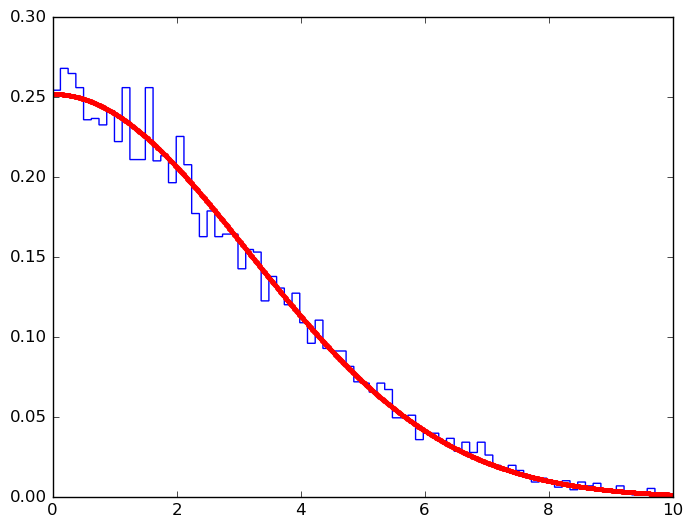

(0,10)

In [16]:
plt[:hist](xfreflection, 100,normed = 1, histtype = "step", color = "b")
t = dt*(nsteps-1)
plot(q, theorconc, "r.-")
plt[:xlim](0,10)

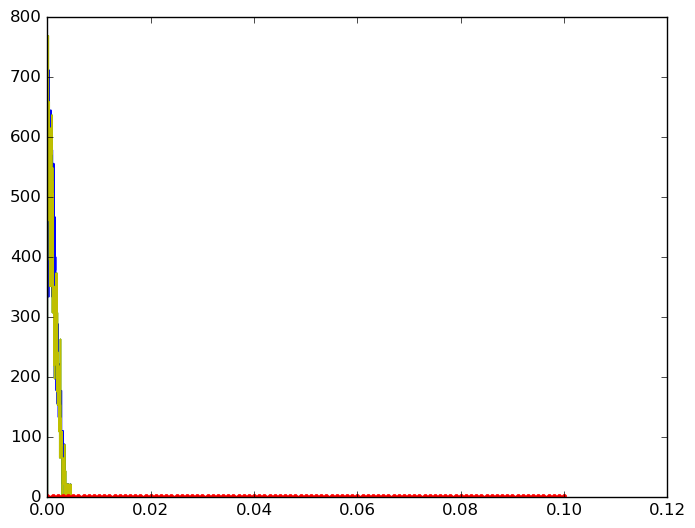

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7feac6f1d650>

In [25]:
t = dt*(nsteps-1)
plt[:hist](xfreflection, 100,normed = 1, histtype = "step", color = "b")
plt[:hist](xfrejupdt, 100,normed = 1, histtype = "step", color = "g")
plt[:hist](xfrejupdt, 100,normed = 1, histtype = "step", color = "y")
plot(q, theorconc, "r.-")

In [38]:
using KernelDensity

In [39]:
kreflection = kde(xfreflection)
krejupdt = kde(xfrejupdt)
krejwupdt = kde(xfrejwupdt)

KernelDensity.UnivariateKDE{FloatRange{Float64}}(-0.15308530772571716:0.0009547975465001831:1.8013852699601576,[4.97838e-5,5.52598e-5,6.13154e-5,6.80067e-5,7.53947e-5,8.35461e-5,9.25332e-5,0.000102435,0.000113337,0.000125332  …  1.75022e-5,1.9392e-5,2.15075e-5,2.38712e-5,2.65078e-5,2.94445e-5,3.27113e-5,3.6341e-5,4.03694e-5,4.4836e-5])

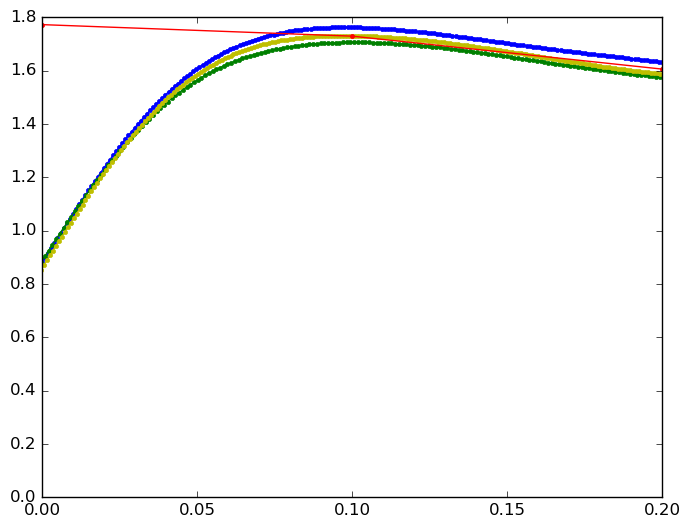

(0,0.2)

In [42]:
plot(kreflection.x,kreflection.density,"b.-")
plot(krejupdt.x,krejupdt.density,"g.-")
plot(krejwupdt.x,krejwupdt.density,"y.-")

plot(q, theorconc, "r.-")
plt[:xlim](0,0.2)